# Proyecto de Analisis de datos - NBA

**Autores:** Diego Pincheira
             Javier Burgos

**Fecha:** Junio 2022

#Mejoras al hito 2:
- Se cambio la motivacion para que se asemejara al hilo conductor del proyecto.
- Reformulacion de las preguntas por problemas de redaccion.
- Justificacion del hilo conductor del analisis del proyecto.
- Se agregan referencias y link del repositorio del proyecto.
- se agregan a las referencias la documentacion ultilizada para la elaboracion del hito.




## Motivacion 
Como equipo Crypt fuimos contratados por una organización que se dedica a entrenar desde pequeño a nuevos talentos en el básquetbol, para esto, nos pidieron que realicemos un análisis exhaustivo del set de datos NBA, del cual se espera poder extraer información útil sobre que estadísticas son más relevantes en los partidos de básquetbol, de esta manera poder diferenciar y focalizar los entrenamientos para mejorar el rendimiento de los jugadores en los partidos futuros. 

La motivación detrás de nuestro equipo de trabajo radica en poder comprender el cambio que ha tenido la liga de la NBA durante estos últimos 20 años. Hace un par de años se consideraba un deporte netamente físico, destacando el juego en la zona de 2 puntos. Pero esto, posterior al año 2000, ha cambiado significativamente,  destacándose mucha más los tiros de 3 puntos, y la necesidad de jugadores capaces de aportar tanto en el juego interior como exterior. 
En la actualidad contamos con bastante  información respecto a este deporte, ya sea las innumerables temporadas de juego, los destacados equipos y sus excepcionales jugadores, nos podrían dar buenos pronósticos de análisis, logrando determinar cambios de rendimiento, según estadísticas de los jugadores, modelos predictivos sobre los mejores resultados de las temporadas de juego, entre otras. Pero principalmente el presente análisis y trabajo a realizar tiene como objetivo identificar, determinar que factores inciden en la cantidad de anotaciones por partidos. Y así, poder predecir que tipo de jugadores son los más determinantes a la hora de jugar. Algo muy útil, viéndolo desde la mirada de un entrenador dispuesto a condicionar su equipo y jugadores hacia la obtención de buenos resultados en los partidos que le toque dirigir.


El NBA games data esta compuesto por 5 datasets

1. Games: Información sobre cada partido y las estadísticas de los equipos que juegan.
2. Games details : Información más detallada sobre las estadísticas de cada jugador.
3. Players : Principalmente información sobre el nombre del jugador y su equipo.
4. Ranking: Información sobre la clasificación de cada equipo en cada jornada a lo largo de la temporada.
5. Teams : Información sobre los equipos.

De los cuales para el analisis en el presente informe considerademos solo 2.
1. games
2. games_details

# **Diccionario**
## *Games_details*

* GAME_ID (ID of the game) 
* TEAM_ID (ID of the team)
* TEAM_ABBREVIATION (Team's abbreviation)
* TEAM_CITY (City where the game was played)
* PLAYER_ID (ID of the player)
* PLAYER_NAME (Player's name)
* NICKNAME
* START_POSITION (Position of the player) (if nothing then he's on the bench)
* MIN (Minutes played)
* FGM (Field Goals Made)
* FGA (Field Goals Attempted)
* FG_PCT (Field Goal Percentage)
* FG3M (Three Pointers Made)
* FG3A (Three Pointers Attempted)
* FG3_PCT (Three Point Percentage)
* FTM (Free Throws Made)
* FTA (Free Throws Attempted)
* FT_PCT (Free Throw Percentage)
* OREB (Offensive Rebounds) 
* DREB (Defensive Rebounds)
* REB (Rebounds), AST (Assists)
* STL (Steals), BLK (Blocked shots)
* TO (Turnovers), PF (Personnal Foul)
* PTS (Number of points scored by the player)
* PLUS_MINUS (Plus - Minus)

## *Games*

* GAME_ID (ID of the game) 
* SEASON  


## Cargar Librerias y datasets

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Se importan los datos de los datasets de la NBA a ultilizar desde el repositorio del proyecto.
gm = pd.read_csv('https://gitlab.com/j.burgos11/ingeniera-de-datos/-/raw/main/BasketballDataset/games.csv', sep=",")[['GAME_ID','SEASON']]
dt = pd.read_csv('https://gitlab.com/j.burgos11/ingeniera-de-datos/-/raw/main/BasketballDataset/games_details.csv', sep=",")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
dt.head()

GAME_ID     TEAM_ID TEAM_ABBREVIATION  TEAM_CITY  PLAYER_ID  \
0  22101005  1610612750               MIN  Minnesota    1630162   
1  22101005  1610612750               MIN  Minnesota    1630183   
2  22101005  1610612750               MIN  Minnesota    1626157   
3  22101005  1610612750               MIN  Minnesota    1627736   
4  22101005  1610612750               MIN  Minnesota    1626156   

          PLAYER_NAME      NICKNAME START_POSITION COMMENT    MIN  ...  OREB  \
0     Anthony Edwards       Anthony              F     NaN  36:22  ...   0.0   
1     Jaden McDaniels         Jaden              F     NaN  23:54  ...   2.0   
2  Karl-Anthony Towns  Karl-Anthony              C     NaN  25:17  ...   1.0   
3       Malik Beasley         Malik              G     NaN  30:52  ...   0.0   
4    D'Angelo Russell      D'Angelo              G     NaN  33:46  ...   0.0   

   DREB   REB  AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  
0   8.0   8.0  5.0  3.0  1.0  1.0  1.0  15.0         5.0  
1   4.0   6.0  0.0  0.0  2.0  2.0  6.0  14.0        10.0  
2   9.0  10.0  0.0  0.0  0.0  3.0  4.0  15.0        14.0  
3   3.0   3.0  1.0  1.0  0.0  1.0  4.0  12.0        20.0  
4   6.0   6.0  9.0  1.0  0.0  5.0  0.0  14.0        17.0  

[5 rows x 29 columns]

En primera instancia es necesario saber las dimensiones de los datos. En donde el dataset games_details consta de, 645953 filas y 29 columnas respectivamente.

In [8]:
dt.shape #dimensiones dataset

(645953, 29)

In [9]:
dt.columns #Los nombres de las columnas del dataset son las siguientes:

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object')

A continuación visualizamos que tipo de variables contiene el conjunto de datos.

In [10]:
dt.info() #tipos de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645953 entries, 0 to 645952
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            645953 non-null  int64  
 1   TEAM_ID            645953 non-null  int64  
 2   TEAM_ABBREVIATION  645953 non-null  object 
 3   TEAM_CITY          645953 non-null  object 
 4   PLAYER_ID          645953 non-null  int64  
 5   PLAYER_NAME        645953 non-null  object 
 6   NICKNAME           30362 non-null   object 
 7   START_POSITION     247215 non-null  object 
 8   COMMENT            105602 non-null  object 
 9   MIN                540350 non-null  object 
 10  FGM                540350 non-null  float64
 11  FGA                540350 non-null  float64
 12  FG_PCT             540350 non-null  float64
 13  FG3M               540350 non-null  float64
 14  FG3A               540350 non-null  float64
 15  FG3_PCT            540350 non-null  float64
 16  FT

Vamos a visualizar una fila del dataset game_details. En donde podemos observar la presencia de valores Na o nulos en varios de sus atributos.


In [11]:
dt.loc[435534]

GAME_ID                 21700945
TEAM_ID               1610612764
TEAM_ABBREVIATION            WAS
TEAM_CITY             Washington
PLAYER_ID                 204025
PLAYER_NAME          Tim Frazier
NICKNAME                     NaN
START_POSITION               NaN
COMMENT                      NaN
MIN                        17:32
FGM                          1.0
FGA                          4.0
FG_PCT                      0.25
FG3M                         0.0
FG3A                         3.0
FG3_PCT                      0.0
FTM                          0.0
FTA                          0.0
FT_PCT                       0.0
OREB                         0.0
DREB                         0.0
REB                          0.0
AST                          2.0
STL                          1.0
BLK                          0.0
TO                           0.0
PF                           2.0
PTS                          2.0
PLUS_MINUS                   2.0
Name: 435534, dtype: object

## Preprocesamiento de los Datos
En esta etapa se procede a recopilar, preparar los datos y realizar una limpieza para la posterior realizacion del EDA. Esto es de suma importancia para la creacion de los modelos.

In [7]:
#Valores NaN por atributo del dataset games_details
count_na = dt.isna().sum().sort_values()
print ('Columnas con valores NaN en el dataset games_details:')
print(count_na)

Columnas con valores NaN en el dataset games_details:
GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
PF                   105603
TO                   105603
BLK                  105603
STL                  105603
AST                  105603
REB                  105603
DREB                 105603
OREB                 105603
FT_PCT               105603
FTA                  105603
FG3A                 105603
FG3_PCT              105603
PTS                  105603
FG3M                 105603
FG_PCT               105603
FGA                  105603
FGM                  105603
MIN                  105603
FTM                  105603
PLUS_MINUS           129264
START_POSITION       398738
COMMENT              540351
NICKNAME             615591
dtype: int64


- Al ver la cantidad de valores NaN , se llega a la conclusion que es necesario eliminar las columnas 'NICKNAME', 'COMMENT', 'PLUS_MINUS', 'TEAM_ABBREVIATION' , 'TEAM_CITY' y 'TEAM_ID', estas dos ultimas no seran ultilizadas en la exploracion de datos , dado que el foco del analisis del proyecto son las estadisticas de los jugadores por partido.
- Se destaca que la variable 'START_POSITION' presenta 398738 ocurrencias con valores nulos, pero debido a que de momento no podemos descartar que la posicion inicial sea un factor de incidencia en los partidos jugados, esta no sera eliminada.

In [8]:
dt_clean = dt.drop(['TEAM_ABBREVIATION','NICKNAME','COMMENT','PLUS_MINUS','TEAM_CITY','TEAM_ID'],axis=1)
dt_clean

GAME_ID  PLAYER_ID         PLAYER_NAME START_POSITION    MIN  FGM  \
0       22101005    1630162     Anthony Edwards              F  36:22  4.0   
1       22101005    1630183     Jaden McDaniels              F  23:54  6.0   
2       22101005    1626157  Karl-Anthony Towns              C  25:17  4.0   
3       22101005    1627736       Malik Beasley              G  30:52  4.0   
4       22101005    1626156    D'Angelo Russell              G  33:46  3.0   
...          ...        ...                 ...            ...    ...  ...   
645948  11200005     202706     Jordan Hamilton            NaN     19  4.0   
645949  11200005     202702      Kenneth Faried            NaN     23  7.0   
645950  11200005     201585        Kosta Koufos            NaN     15  3.0   
645951  11200005     202389      Timofey Mozgov            NaN     19  1.0   
645952  11200005     201951           Ty Lawson            NaN     27  3.0   

         FGA  FG_PCT  FG3M  FG3A  ...  FT_PCT  OREB  DREB   REB  AST  STL  \
0       10.0   0.400   3.0   8.0  ...   1.000   0.0   8.0   8.0  5.0  3.0   
1        8.0   0.750   1.0   3.0  ...   1.000   2.0   4.0   6.0  0.0  0.0   
2        9.0   0.444   1.0   3.0  ...   0.750   1.0   9.0  10.0  0.0  0.0   
3        9.0   0.444   4.0   9.0  ...   0.000   0.0   3.0   3.0  1.0  1.0   
4       13.0   0.231   1.0   6.0  ...   1.000   0.0   6.0   6.0  9.0  1.0   
...      ...     ...   ...   ...  ...     ...   ...   ...   ...  ...  ...   
645948   9.0   0.444   3.0   6.0  ...   0.857   0.0   2.0   2.0  0.0  2.0   
645949  11.0   0.636   0.0   0.0  ...   1.000   1.0   0.0   1.0  1.0  1.0   
645950   7.0   0.429   0.0   0.0  ...   0.000   3.0   5.0   8.0  0.0  1.0   
645951   1.0   1.000   0.0   0.0  ...   0.000   1.0   2.0   3.0  1.0  0.0   
645952   6.0   0.500   0.0   0.0  ...   0.500   0.0   2.0   2.0  6.0  2.0   

        BLK   TO   PF   PTS  
0       1.0  1.0  1.0  15.0  
1       2.0  2.0  6.0  14.0  
2       0.0  3.0  4.0  15.0  
3       0.0  1.0  4.0  12.0  
4       0.0  5.0  0.0  14.0  
...     ...  ...  ...   ...  
645948  0.0  1.0  3.0  17.0  
645949  0.0  3.0  3.0  18.0  
645950  0.0  0.0  3.0   6.0  
645951  0.0  4.0  2.0   2.0  
645952  0.0  6.0  1.0   8.0  

[645953 rows x 23 columns]

Procedemos a reemplazar los valores vacios de nuestros datos con cero, debido a una baja presencia de valores vacios. 

In [9]:
dt_clean.fillna(0, inplace = True)

Luego visualizamos mediante la siguiente sentencia, si el proceso de realizo de forma correcta.

In [10]:
print (f'Tiene {dt_clean.isna().sum().sum()} valores nulos.\n')

Tiene 0 valores nulos.



Posteriormente, debemos comprobar que el dataset no presenta filas duplicadas segun 'GAME_ID' y 'PLAYER_ID'. Con la siguiente sentencia nos sercioramos de esto.

In [11]:
dt_clean[dt_clean.duplicated(subset=['GAME_ID','PLAYER_ID'], keep="first")]

GAME_ID  PLAYER_ID               PLAYER_NAME START_POSITION    MIN  \
43304  22000069    1628960             Grayson Allen              0      0   
43305  22000069    1629007             Jontay Porter              0      0   
43306  22000069    1630214            Xavier Tillman              0      0   
43307  22000069    1630176          Vernon Carey Jr.              0      0   
43308  22000069    1628370                Malik Monk              0      0   
...         ...        ...                       ...            ...    ...   
60154  22000002    1628379              Luke Kennard              0  21:03   
60155  22000002     203484  Kentavious Caldwell-Pope              G  23:03   
60156  22000002     203471           Dennis Schroder              G  27:48   
60157  22000002    1628398                Kyle Kuzma              0  26:38   
60158  22000002     202693           Markieff Morris              0  19:00   

       FGM   FGA  FG_PCT  FG3M  FG3A  ...  FT_PCT  OREB  DREB   REB  AST  STL  \
43304  0.0   0.0   0.000   0.0   0.0  ...   0.000   0.0   0.0   0.0  0.0  0.0   
43305  0.0   0.0   0.000   0.0   0.0  ...   0.000   0.0   0.0   0.0  0.0  0.0   
43306  0.0   0.0   0.000   0.0   0.0  ...   0.000   0.0   0.0   0.0  0.0  0.0   
43307  0.0   0.0   0.000   0.0   0.0  ...   0.000   0.0   0.0   0.0  0.0  0.0   
43308  0.0   0.0   0.000   0.0   0.0  ...   0.000   0.0   0.0   0.0  0.0  0.0   
...    ...   ...     ...   ...   ...  ...     ...   ...   ...   ...  ...  ...   
60154  2.0   6.0   0.333   0.0   3.0  ...   0.000   0.0   2.0   2.0  2.0  2.0   
60155  2.0   4.0   0.500   1.0   3.0  ...   1.000   0.0   2.0   2.0  1.0  2.0   
60156  5.0  15.0   0.333   2.0   5.0  ...   0.500   1.0  11.0  12.0  8.0  0.0   
60157  6.0  11.0   0.545   1.0   3.0  ...   1.000   0.0   1.0   1.0  0.0  0.0   
60158  1.0   3.0   0.333   1.0   2.0  ...   0.667   1.0   3.0   4.0  1.0  0.0   

       BLK   TO   PF   PTS  
43304  0.0  0.0  0.0   0.0  
43305  0.0  0.0  0.0   0.0  
43306  0.0  0.0  0.0   0.0  
43307  0.0  0.0  0.0   0.0  
43308  0.0  0.0  0.0   0.0  
...    ...  ...  ...   ...  
60154  1.0  1.0  3.0   4.0  
60155  1.0  2.0  2.0   9.0  
60156  0.0  1.0  4.0  14.0  
60157  0.0  2.0  2.0  15.0  
60158  0.0  0.0  0.0   5.0  

[289 rows x 23 columns]

Luego, procedemos a eliminar las ocurrencias duplicadas 

In [12]:
dt_clean.drop_duplicates(subset=['GAME_ID','PLAYER_ID'],keep="first",inplace=True)
dt_clean.head()

GAME_ID  PLAYER_ID         PLAYER_NAME START_POSITION    MIN  FGM   FGA  \
0  22101005    1630162     Anthony Edwards              F  36:22  4.0  10.0   
1  22101005    1630183     Jaden McDaniels              F  23:54  6.0   8.0   
2  22101005    1626157  Karl-Anthony Towns              C  25:17  4.0   9.0   
3  22101005    1627736       Malik Beasley              G  30:52  4.0   9.0   
4  22101005    1626156    D'Angelo Russell              G  33:46  3.0  13.0   

   FG_PCT  FG3M  FG3A  ...  FT_PCT  OREB  DREB   REB  AST  STL  BLK   TO   PF  \
0   0.400   3.0   8.0  ...    1.00   0.0   8.0   8.0  5.0  3.0  1.0  1.0  1.0   
1   0.750   1.0   3.0  ...    1.00   2.0   4.0   6.0  0.0  0.0  2.0  2.0  6.0   
2   0.444   1.0   3.0  ...    0.75   1.0   9.0  10.0  0.0  0.0  0.0  3.0  4.0   
3   0.444   4.0   9.0  ...    0.00   0.0   3.0   3.0  1.0  1.0  0.0  1.0  4.0   
4   0.231   1.0   6.0  ...    1.00   0.0   6.0   6.0  9.0  1.0  0.0  5.0  0.0   

    PTS  
0  15.0  
1  14.0  
2  15.0  
3  12.0  
4  14.0  

[5 rows x 23 columns]

## Exploracion de Datos dataset NBA basketball

 En primer lugar, necesitamos comprender la naturaleza del conjunto de datos que se nos ha entregado para poder extraer información que nos sea útil.
Según lo planteado en la introducción buscaremos en nuestro dataset, características que nos puedan dar una primera visión de los datos con los cuales trabajaremos para la posterior creacion de modelos experimentales.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

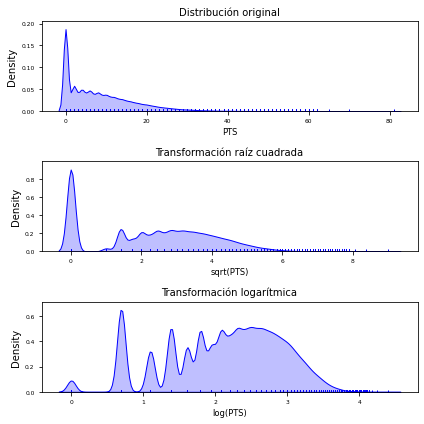

In [ ]:
#Vamos a visualizar la distribucion de los puntos (PTS) de los jugadores de la NBA con los datos limpios. 
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    dt_clean.PTS,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('PTS', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(dt_clean.PTS),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(PTS)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(dt_clean.PTS),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(PTS)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()


Podemos observar un ajuste deficiente de la distribución de los datos, concentrando una mayor cantidad de PTS conforme la densidad de jugadores desciende, acotándose a una pequeña población que destaca por sobre el resto de jugadores. Por otro lado, en la varianza observamos que la densidad de jugadores se regula y es mayor en un rango de 2 y 3 PTS, pero podemos, además, visualizar ciertos outliers o valores atípicos presentes en el gráfico, los cuales se pueden observar de forma más detallada en la función logarítmica(log-normal).
Evidenciando que la robustez de datos es mejor en esta función, donde se visualiza de manera limpia que valores pertenecen a los outliers o valores atípicos.

Vamos a proceder a agrupar los datos por el nombre de jugador, sumando todas las estadisticas de los partidos, ordenandolos de manera descendente. Con el objetivo de visualizar mediante una tabla lo observado en los graficos anteriores.

In [ ]:
players = dt_clean.groupby('PLAYER_NAME').sum()
orp = players.sort_values('PTS', ascending = False)
orp.head()

GAME_ID  PLAYER_ID      FGM      FGA   FG_PCT    FG3M  \
PLAYER_NAME                                                                  
LeBron James     41587688871    4467264  16601.0  33030.0  856.703  2598.0   
Carmelo Anthony  32674897854    3834276  11231.0  25283.0  623.445  1910.0   
Kevin Durant     27114583649  233928146  10468.0  21264.0  568.568  2165.0   
Dwyane Wade      31639598577    3483116  10256.0  21466.0  615.639   688.0   
Dirk Nowitzki    30371473938    2367743   9908.0  21014.0  625.729  1552.0   

                   FG3A  FG3_PCT     FTM      FTA    FT_PCT    OREB     DREB  \
PLAYER_NAME                                                                    
LeBron James     7549.0  513.343  9857.0  13409.0  1220.483  2035.0  10826.0   
Carmelo Anthony  5393.0  429.519  7154.0   8782.0  1050.053  2215.0   6513.0   
Kevin Durant     5684.0  434.147  7550.0   8589.0   976.440   804.0   7223.0   
Dwyane Wade      2289.0  223.833  6902.0   9009.0   924.819  1537.0   4544.0   
Dirk Nowitzki    4100.0  441.192  6559.0   7376.0  1047.120  1219.0   8715.0   

                     REB      AST     STL     BLK      TO      PF      PTS  
PLAYER_NAME                                                                 
LeBron James     12861.0  12255.0  2692.0  1321.0  5928.0  3213.0  45657.0  
Carmelo Anthony   8728.0   3802.0  1403.0   705.0  3460.0  4026.0  31526.0  
Kevin Durant      8027.0   4696.0  1234.0  1252.0  3520.0  2259.0  30651.0  
Dwyane Wade       6081.0   6809.0  1993.0  1093.0  4088.0  2930.0  28102.0  
Dirk Nowitzki     9934.0   3213.0   997.0  1068.0  2175.0  2997.0  27927.0

Donde se evidencia que existen jugadores que presentan estadisticas sobre el la media de jugadores. Como por ejemplo se ve que el jugador Lebron James ha realizado más puntos en el transcurso del tiempo. Pero, es importante mencionar aquí que el conjunto de datos muestra los partidos desde la temporada 2003 a la 2021. Por otro lado, debemos considerada que el año 2003 Lebron James ingresa a la NBA como rookie, dándole el sentido a este ejemplo.

- Para poder acotar de cierta manera el alcance de los casos experimentales a realizar , es que se debe insertar la columna 'SEASON' del dataset games.

In [18]:
dt_clean = pd.merge(dt_clean,gm,how='left',on='GAME_ID')
dt_clean.head()

GAME_ID  PLAYER_ID         PLAYER_NAME START_POSITION    MIN  FGM   FGA  \
0  22101005    1630162     Anthony Edwards              F  36:22  4.0  10.0   
1  22101005    1630183     Jaden McDaniels              F  23:54  6.0   8.0   
2  22101005    1626157  Karl-Anthony Towns              C  25:17  4.0   9.0   
3  22101005    1627736       Malik Beasley              G  30:52  4.0   9.0   
4  22101005    1626156    D'Angelo Russell              G  33:46  3.0  13.0   

   FG_PCT  FG3M  FG3A  ...  OREB  DREB   REB  AST  STL  BLK   TO   PF   PTS  \
0   0.400   3.0   8.0  ...   0.0   8.0   8.0  5.0  3.0  1.0  1.0  1.0  15.0   
1   0.750   1.0   3.0  ...   2.0   4.0   6.0  0.0  0.0  2.0  2.0  6.0  14.0   
2   0.444   1.0   3.0  ...   1.0   9.0  10.0  0.0  0.0  0.0  3.0  4.0  15.0   
3   0.444   4.0   9.0  ...   0.0   3.0   3.0  1.0  1.0  0.0  1.0  4.0  12.0   
4   0.231   1.0   6.0  ...   0.0   6.0   6.0  9.0  1.0  0.0  5.0  0.0  14.0   

   SEASON  
0    2021  
1    2021  
2    2021  
3    2021  
4    2021  

[5 rows x 24 columns]

In [ ]:
start_position_stats = dt_clean.groupby('START_POSITION').sum()/dt_clean.groupby('START_POSITION').count()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Promedios de tiros realizados por posicion inicial', fontsize=20)
sns.barplot(x=start_position_stats["FGA"], y = start_position_stats.index.map(str), ax=axes[0])
sns.lineplot(y=start_position_stats["FGA"], x = start_position_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

A partir de los resultados del grafico por posicion inicial , podemos concluir que la posicion inicial si tiene incidencia en la realizacion de tiros por partidos. Ojo que esto fue realizado incluyendo los partidos en donde los jugadores no tenian una posicion inicial definida.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

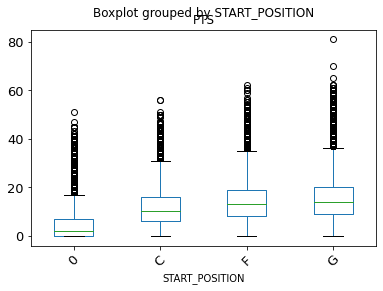

In [ ]:
boxplot = dt_clean.boxplot(column=['PTS'],by='START_POSITION',grid=False, rot=45, fontsize=13)
boxplot.plot()


- A partir de los resultados, se aprecia la presencia de valores atipicos en cada posicion. Siendo la posicion de Guard la que presenta una mayor cantidad de valores atipicos y con un valor mas alejado de la media de los datos. En donde podemos concluir que esto pudo afectar a la robustez del grafico de promedio de  tiros realizados por la posicion inicial. 
- Tambien se visualiza que los jugadores que no presentan una posicion inicial definida, presentan valores atipicos.

In [ ]:
points_stats = dt_clean.groupby('SEASON').sum()/dt_clean.groupby('SEASON').count()

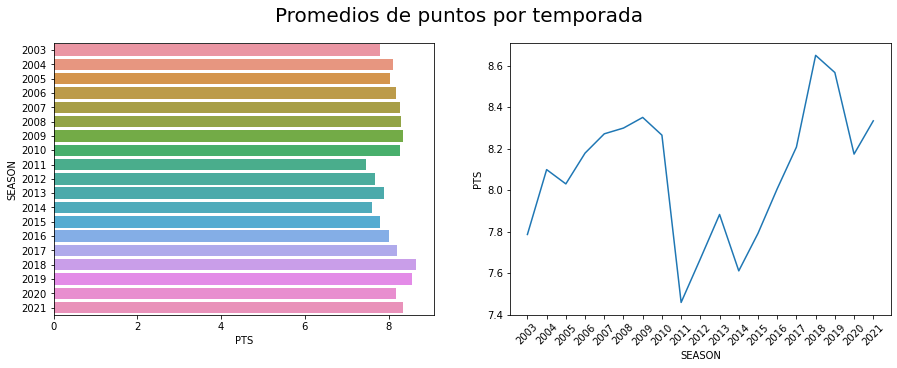

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Promedios de puntos por temporada', fontsize=20)
sns.barplot(x=points_stats["PTS"], y = points_stats.index.map(str), ax=axes[0])
sns.lineplot(y=points_stats["PTS"], x = points_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

- Del grafico anterior podemos visualizar que la importancia de que entre las temporadas 2003 y 2009 hubo un promedio de puntos relativamente homogeneo. El cual fue descendiendo las tres temporadas siguientes. 
- En donde a partir de la temporada 2014-2015 el aumento de puntos por partido fue exponencial. Debido al surgimiento de equipos como los Spurs y los Golden State Warrior, que fueron los precursores en el cambio que tuvo la NBA a la hora de estructurar su juego.

In [ ]:
seasonal_stats = dt_clean.groupby('SEASON').sum()/dt_clean.groupby('SEASON').count()

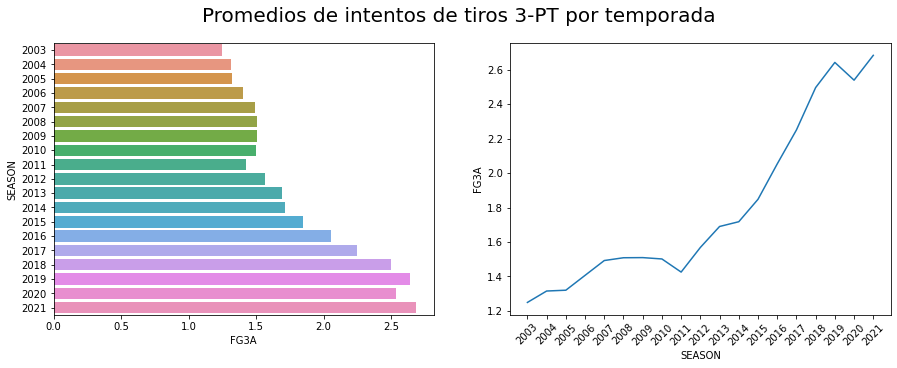

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Promedios de intentos de tiros 3-PT por temporada', fontsize=20)
sns.barplot(x=seasonal_stats["FG3A"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["FG3A"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

A partir del gráfico, podemos concluir que los intentos de tiros de 3 puntos por temporada ha ido aumentando. Esto se debe al cambio estructural que ha tenido la NBA a través de los años, y por ende debemos buscar que factores inciden en este cambio.

In [19]:
dt_clean.head()

GAME_ID  PLAYER_ID         PLAYER_NAME START_POSITION    MIN  FGM   FGA  \
0  22101005    1630162     Anthony Edwards              F  36:22  4.0  10.0   
1  22101005    1630183     Jaden McDaniels              F  23:54  6.0   8.0   
2  22101005    1626157  Karl-Anthony Towns              C  25:17  4.0   9.0   
3  22101005    1627736       Malik Beasley              G  30:52  4.0   9.0   
4  22101005    1626156    D'Angelo Russell              G  33:46  3.0  13.0   

   FG_PCT  FG3M  FG3A  ...  OREB  DREB   REB  AST  STL  BLK   TO   PF   PTS  \
0   0.400   3.0   8.0  ...   0.0   8.0   8.0  5.0  3.0  1.0  1.0  1.0  15.0   
1   0.750   1.0   3.0  ...   2.0   4.0   6.0  0.0  0.0  2.0  2.0  6.0  14.0   
2   0.444   1.0   3.0  ...   1.0   9.0  10.0  0.0  0.0  0.0  3.0  4.0  15.0   
3   0.444   4.0   9.0  ...   0.0   3.0   3.0  1.0  1.0  0.0  1.0  4.0  12.0   
4   0.231   1.0   6.0  ...   0.0   6.0   6.0  9.0  1.0  0.0  5.0  0.0  14.0   

   SEASON  
0    2021  
1    2021  
2    2021  
3    2021  
4    2021  

[5 rows x 24 columns]

## Preguntas y Problemas
- ¿De qué maneras se podría predecir la eficiencia en un partido por parte de los  jugadores a partir de los datos disponibles? ¿Qué beneficios aportará a los entrenamientos  esta predicción?
- ¿Existen caracteristica que nos indiquen que tipo de jugadores tienen un mayor impacto en los partidos jugados? 
-  Como en todo equipo siempre hay cambios, algunos con un menor impacto que otros, ¿Qué tan eficientes pueden ser estos jugadores en las próximas temporadas?

- En la mayoria de los partidos, los jugadores tienen definida una posicion inicial, las cuales suelen ser determinantes a la hora de jugar. En una escala medible, ¿Qué tan eficiente pueden ser los jugadores a partir de la posición inicial?

## Propuesta Experimental

Para poder responder la pregunta enfocada a la realizacion de una prediccion, de si que estadisticas tienen un mayor impacto para predecir la eficiencia de los jugadores por partido. Se implementara un modelo de aprendizaje no supervisado, mendiante el uso de algoritmos de clustering. Se emplean los algoritmos de clustering para poder determinar patrones en los conjuntos de datos games_details, ya que estos no cuentan con alguna forma de categorización o etiquetado durante el EDA, agrupándolos, obteniendo una descripción general de la estructura de los datos de forma que sean significativos y útiles para lo que se busca analizar. Ademas, es necesaro agregar una nueva columna que represente la eficiencia de los jugadores.




##Eficiencia
La NBA publica en Internet todas las estadísticas básicas registradas oficialmente por la liga. La eficiencia individual de los jugadores se expresa allí mediante una estadística denominada "eficiencia" y abreviada EFF. Se obtiene mediante una sencilla fórmula:

Índice de eficiencia de la NBA:
(PTS + REB + AST + STL + BLK - ((FGA - FGM) + (FTA - FTM) + TO))

In [13]:
average_eff = (
    dt_clean['PTS'].mean() +
    dt_clean['REB'].mean() + 
    dt_clean['AST'].mean() + 
    dt_clean['STL'].mean() + 
    dt_clean['BLK'].mean() - (
    dt_clean['FGA'].mean() -
    dt_clean['FGM'].mean()
    ) + (
        dt_clean['FTA'].mean() -
        dt_clean['FTM'].mean()
    ) +
    dt_clean['TO'].mean()
)
average_eff

12.190108167715719

In [14]:
dt_clean['EFF'] = (
    dt_clean['PTS'] + 
    dt_clean['REB'] + 
    dt_clean['AST'] + 
    dt_clean['STL'] + 
    dt_clean['BLK'] - (
    dt_clean['FGA'] -
    dt_clean['FGM']
    ) + (
        dt_clean['FTA'] -
        dt_clean['FTM']
    ) +
    dt_clean['TO']
)
dt_clean.head()

GAME_ID  PLAYER_ID         PLAYER_NAME START_POSITION    MIN  FGM   FGA  \
0  22101005    1630162     Anthony Edwards              F  36:22  4.0  10.0   
1  22101005    1630183     Jaden McDaniels              F  23:54  6.0   8.0   
2  22101005    1626157  Karl-Anthony Towns              C  25:17  4.0   9.0   
3  22101005    1627736       Malik Beasley              G  30:52  4.0   9.0   
4  22101005    1626156    D'Angelo Russell              G  33:46  3.0  13.0   

   FG_PCT  FG3M  FG3A  ...  OREB  DREB   REB  AST  STL  BLK   TO   PF   PTS  \
0   0.400   3.0   8.0  ...   0.0   8.0   8.0  5.0  3.0  1.0  1.0  1.0  15.0   
1   0.750   1.0   3.0  ...   2.0   4.0   6.0  0.0  0.0  2.0  2.0  6.0  14.0   
2   0.444   1.0   3.0  ...   1.0   9.0  10.0  0.0  0.0  0.0  3.0  4.0  15.0   
3   0.444   4.0   9.0  ...   0.0   3.0   3.0  1.0  1.0  0.0  1.0  4.0  12.0   
4   0.231   1.0   6.0  ...   0.0   6.0   6.0  9.0  1.0  0.0  5.0  0.0  14.0   

    EFF  
0  27.0  
1  22.0  
2  25.0  
3  13.0  
4  25.0  

[5 rows x 24 columns]

Asignamos a la variable Selected, las estadísticas ya mencionadas y las ordenamos de forma descendente por medida de Eficiencia, visualizando a los 10 primeros jugadores más eficientes.

In [15]:
selected = [
    'PLAYER_NAME','PTS', 'REB', 'AST', 'STL', 'BLK',
    'FGA', 'FGM', 'FTA', 'FTM', 'TO', 'EFF'
]

dt_clean[selected].sort_values(
    by = "EFF",
    ascending = False
).head(10)

PLAYER_NAME   PTS   REB   AST  STL  BLK   FGA   FGM   FTA   FTM  \
307929  Dwight Howard  45.0  23.0   3.0  4.0  2.0  21.0  12.0  39.0  21.0   
482638   James Harden  53.0  16.0  17.0  0.0  0.0  26.0  14.0  18.0  16.0   
440401   James Harden  60.0  10.0  11.0  4.0  1.0  30.0  19.0  18.0  17.0   
29077    Kevin Durant  49.0  17.0  10.0  3.0  2.0  23.0  16.0  16.0  13.0   
204039    Kobe Bryant  81.0   6.0   2.0  3.0  1.0  46.0  28.0  20.0  18.0   
139736    Dwyane Wade  48.0   7.0  11.0  3.0  3.0  21.0  16.0  23.0  16.0   
511543  Anthony Davis  59.0  20.0   4.0  0.0  1.0  34.0  24.0  10.0   9.0   
93035     Dwyane Wade  48.0   6.0  12.0  4.0  3.0  21.0  15.0  18.0  13.0   
468014   Devin Booker  70.0   8.0   6.0  3.0  1.0  40.0  21.0  26.0  24.0   
96668   Dwight Howard  45.0  19.0   0.0  1.0  8.0  23.0  16.0  18.0  13.0   

         TO   EFF  
307929  3.0  89.0  
482638  8.0  84.0  
440401  5.0  81.0  
29077   3.0  80.0  
204039  3.0  80.0  
139736  5.0  79.0  
511543  2.0  77.0  
93035   5.0  77.0  
468014  5.0  76.0  
96668   5.0  76.0

In [16]:
condition_eff = [
    (dt_clean['EFF'] >= 12.189658052760047) & (dt_clean['EFF'] != 0),
    (dt_clean['EFF'] < 12.189658052760047) & (dt_clean['EFF'] != 0)
]

efficient = [1,0]
dt_clean['EFF'] = np.select(condition_eff,efficient)
dt_clean.head()

GAME_ID  PLAYER_ID         PLAYER_NAME START_POSITION    MIN  FGM   FGA  \
0  22101005    1630162     Anthony Edwards              F  36:22  4.0  10.0   
1  22101005    1630183     Jaden McDaniels              F  23:54  6.0   8.0   
2  22101005    1626157  Karl-Anthony Towns              C  25:17  4.0   9.0   
3  22101005    1627736       Malik Beasley              G  30:52  4.0   9.0   
4  22101005    1626156    D'Angelo Russell              G  33:46  3.0  13.0   

   FG_PCT  FG3M  FG3A  ...  OREB  DREB   REB  AST  STL  BLK   TO   PF   PTS  \
0   0.400   3.0   8.0  ...   0.0   8.0   8.0  5.0  3.0  1.0  1.0  1.0  15.0   
1   0.750   1.0   3.0  ...   2.0   4.0   6.0  0.0  0.0  2.0  2.0  6.0  14.0   
2   0.444   1.0   3.0  ...   1.0   9.0  10.0  0.0  0.0  0.0  3.0  4.0  15.0   
3   0.444   4.0   9.0  ...   0.0   3.0   3.0  1.0  1.0  0.0  1.0  4.0  12.0   
4   0.231   1.0   6.0  ...   0.0   6.0   6.0  9.0  1.0  0.0  5.0  0.0  14.0   

   EFF  
0    1  
1    1  
2    1  
3    1  
4    1  

[5 rows x 24 columns]

A continuación convertiremos la información categórica en vectores de 1 y 0. Para ello utilizaremos la técnica One Hot Encoding con la información de la posicion inicial de los jugadores. Finalmente concatenaremos estos vectores al DataFrame original y eliminaremos las columnas con datos categóricos.

In [17]:
dt_start_position = pd.get_dummies(dt_clean['START_POSITION'], prefix='START_POSITION', prefix_sep='_', drop_first=True)
dt_use = pd.concat([dt_clean, dt_start_position], axis=1).drop('START_POSITION', axis = 1 ).drop('GAME_ID', axis = 1).drop('MIN', axis = 1)

Luego, procederemos a separar los datos cuantitativos de los cualitativos


In [18]:
dt_numeric = dt_use.select_dtypes(include= np.number)
dt_numeric.head()

PLAYER_ID  FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  ...  \
0    1630162  4.0  10.0   0.400   3.0   8.0    0.375  4.0  4.0    1.00  ...   
1    1630183  6.0   8.0   0.750   1.0   3.0    0.333  1.0  1.0    1.00  ...   
2    1626157  4.0   9.0   0.444   1.0   3.0    0.333  6.0  8.0    0.75  ...   
3    1627736  4.0   9.0   0.444   4.0   9.0    0.444  0.0  0.0    0.00  ...   
4    1626156  3.0  13.0   0.231   1.0   6.0    0.167  7.0  7.0    1.00  ...   

   AST  STL  BLK   TO   PF   PTS  EFF  START_POSITION_C  START_POSITION_F  \
0  5.0  3.0  1.0  1.0  1.0  15.0    1                 0                 1   
1  0.0  0.0  2.0  2.0  6.0  14.0    1                 0                 1   
2  0.0  0.0  0.0  3.0  4.0  15.0    1                 1                 0   
3  1.0  1.0  0.0  1.0  4.0  12.0    1                 0                 0   
4  9.0  1.0  0.0  5.0  0.0  14.0    1                 0                 0   

   START_POSITION_G  
0                 0  
1                 0  
2                 0  
3                 1  
4                 1  

[5 rows x 23 columns]

#Clustering

#kmeans
Una forma de estimar el número de clusters es mediante la suma de la diferencia al cuadrado entre los puntos de cada cluster (SSE). En scikit-learn este dato se llama inertia_Una técnica para encontrar un número razonable de clusters a usar es el método del codo donde calculamos el SSE para varios números de clusters y graficamos como varía el SSE, eligiendo el "mejor". Este concepto de "mejor" no es claro, pero en este contexto esa elección será basándose en nuestro criterio. En donde debemos elegir teniendo en cuenta la existencia previa de jugadores que destacan en lo ofensivo como lo defensivo, y a su vez existen jugadores en menor frecuencias que destacan en ambas cosas.
Primero intentaremos encontrar la cantidad de tipos de jugadores en los datos usando K-Means. Cuando usamos esta técnica debemos definir previamente el número de clusters que queremos generar. Teniendo en cuenta estos datos, implementaremos un método que nos permita determinar cuántos clusters usar.

In [21]:
st_dt = StandardScaler().fit_transform(dt_use.drop(columns = ['PLAYER_ID', 'PLAYER_NAME'])) #Estandarizando las variables

In [22]:
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

sse = []

clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(st_dt)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo")
plt.xlabel("No. de clusters")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

random_state = 20

kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=random_state)
kmeans.fit(st_dt) # fit retorna a self
y_pred = kmeans.predict(st_dt)
y_pred

array([2, 0, 0, ..., 1, 1, 2], dtype=int32)

In [23]:
kmeans.inertia_ #error del modelo de clustering

9037366.531741679

Mediante el uso del método del codo podemos estimar el número razonable de clusters en donde bajo nuestro criterio el valor más óptimo podría ser 3, que es donde se acentúa la curva.

In [31]:
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=random_state)
kmeans.fit(st_dt) # fit retorna a self
y_pred = kmeans.predict(st_dt)
y_pred

array([2, 0, 0, ..., 1, 1, 2], dtype=int32)

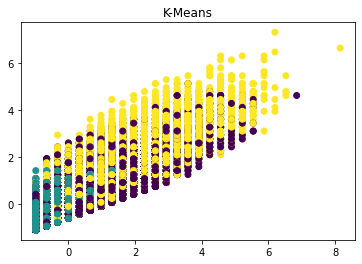

In [32]:
plt.scatter(st_dt[:, 0], st_dt[:, 1], c=kmeans.labels_)
plt.title("K-Means")
plt.show()

Tenemos que mediante el uso de kmeans no es posible diferenciar entre los cluster, esto se debe a la dimensionalidad del dataset games_details. Es necesario realizar una reduccion de dimensionalidad para poder hacer una diferenciacion y poder diferenciar de mejor manera entre los grupos que se forman.

##PCA
- Es un método matemático que se utiliza para reducir el número de variables de forma que pasemos a tener el mínimo número de nuevas variables y que representen a todas las antiguas variables de la forma más representativa posible. Es decir, si se reduce el número de variables a dos o tres nuevas, se pueden representar los datos originales en el plano o en un gráfico de tres dimensiones y, así, se visualiza de forma gráfica un resumen de nuestros datos.

- Debido al que el conjunto de datos contiene muchas variables o atributos que pueden ser ultilizados para el analisis. Algunas combinaciones de variables pueden ser mas significativas que otras o nos pueden ofrecer informacion mas valiosa para la posterior creacion del modelo. En esta etapa inicial se hara uso de PCA para reducir las estadisticas individuales de los jugadores en 2 grupos. Jugadores Ofensivos y jugadores defensivos con el objetivo de interpretar los datos de la forma mas significativa.

In [26]:
from sklearn.decomposition import PCA
dt_pca_NBA = PCA(n_components=2)
x_pca = dt_pca_NBA.fit_transform(st_dt)


In [27]:
st_dt.shape

(645664, 22)

In [28]:
x_pca.shape

(645664, 2)

In [29]:
model_dt_NBA = pd.DataFrame(dt_pca_NBA .components_, 
             index = ['OFENSIVE', 'DEFENSIVE'],
             columns =dt_use.drop(columns = ['PLAYER_ID', 'PLAYER_NAME']).columns).round(2)
styles = [dict(selector="caption", props=[("caption-side", "bottom")])]
model_dt_NBA.style.set_table_styles(styles).set_properties(**{'font-size':'14pt'}).background_gradient('Blues').set_precision(2).set_caption('Diferenciacion de jugadores de la temporada 2003 a la 2021')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """


Posterior a la utilización de PCA para la reducción de dimensionalidad tenemos que según el modelo, los atributos destacados para un jugador ofensivo son FGA(Tiros realizados) y FGM(tiros convertidos) lo que tendría sentido dado que estos jugadores poseen estadísticas enfocadas en la conversión de PTS. Ademas, tenemos que esta componente nos indica que las las posiciones iniciales F(Forward) y G(guard) como las posiciones que destacan ofensivamente.
Si lo asemejamos a la realidad, tendria sentido.


Por otro lado, se puede apreciar que los jugadores catalogados como defensivos destacan principalmente en REB(rebotes) y BLK (bloqueos ejecutados). Ademas, nos indica que los jugadores que destacan en lo defensivo tienden a jugar en la posicion inicial de C (Center).

Sí tomamos como ejemplos jugadores como Stephen Curry (jugador con mayor tiros realizados y convertidos en la temporada 2021-2022),  este modelo de manera preliminar tendría sentido con la realidad. También si lo comparamos con jugadores como Marcus Smart (Defensor del año y finalista de la NBA) el cual es un jugador que se caracteriza por el impacto en los Rebotes en general (REB) y una cifra sobre el promedio de bloqueos por partido (BLK) el modelo inicialmente respondería a la pregunta en que destaca un jugador ofensivo de uno defensivo planteado inicialmente.

##Clustering Jerarquico

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
complete = linkage (st_dt, method="complete")
single = linkage(st_dt, method="single")
average = linkage(st_dt, method="average")
ward = linkage(st_dt, method="ward")

Aunque se pudo haber probado el algoritmo de clustering jerarquico , se optó por ignorarlo, debido a la dimensionalidad del dataset,ya que es más costoso en potencia y tiempo. Cabe destacar, que se probó el algoritmo y se cayó varias veces el entorno Google Colab por falta de memoria RAM.

In [ ]:
complete_3 = AgglomerativeClustering(n_clusters=3, linkage="complete").fit(st_dt)
print("Numero de clusters para el metodo complete: ",complete_3.n_clusters)

In [ ]:
ward_3= AgglomerativeClustering(n_clusters=3, linkage="ward").fit(st_dt)
print("Numero de clusters para el metodo ward: ",ward_3.n_clusters)

In [ ]:
plt.scatter(x_pca [:, 0], x_pca [:, 1], c=complete_3)
plt.title("Hierarchical: complete, 4 clusters")
plt.show()

In [ ]:
plt.scatter(x_pca [:, 0],x_pca [:, 1], c=ward_3)
plt.title("Hierarchical: ward, 4 clusters")
plt.show()

##Referencias
 Kumar, B. (2021, 17 octubre). Pandas Replace Nan With 0. Python Guides. https://pythonguides.com/pandas-replace-nan-with-0/

  Custer, C. (2022, 13 abril). Tutorial: Add a Column to a Pandas DataFrame Based on an If-Else Condition. Dataquest. https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

NBA games data (2021, 29 julio) https://www.kaggle.com/datasets/nathanlauga/nba-games

GeeksforGeeks. (2021, 4 marzo). Bar Plot in Matplotlib. https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

 Yellowbrick. (2016-2019).https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

 John Hunter, Darren Dale, Eric Firing, Michael Droettboom and the Matplotlib development team; (2012 - 2022), The Matplotlib development team. https://matplotlib.org/stable/index.html

 Pandas, (2008). https://pandas.pydata.org
 

##Repositorio 

 Proyecto ingeneria de datos (primer semestre 2021). https://gitlab.com/j.burgos11/ingeniera-de-datos